# Cleaning NBA Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 14 stats columns commonly seen for fantasy points in daily week match
stats = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta'
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [5]:
# read in player stats per game data from csv folder
# Ensure first row in the data frame (header = 0), are the headers
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [6]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [7]:
df.sample(5)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
8049,202714,2013-14,73.0,24.0,20.4,2.9,6.9,0.417,0.8,2.5,...,0.9,1.0,0.865,0.3,1.9,3.7,1.2,0.7,0.0,7.5
5731,1890,2008-09,69.0,31.0,35.8,5.5,11.4,0.485,0.1,0.8,...,1.7,2.1,0.796,2.6,5.9,2.0,1.5,1.3,1.0,12.9
8373,203909,2014-15,62.0,22.0,21.8,2.8,7.0,0.396,0.7,2.4,...,1.6,2.1,0.752,1.0,2.2,1.2,1.7,0.7,1.1,7.9
10315,203210,2018-19,65.0,28.0,21.1,3.5,7.3,0.483,1.1,2.7,...,1.2,1.6,0.792,1.6,4.7,0.8,1.3,0.7,0.5,9.4
2583,70,2001-02,65.0,36.0,11.9,1.6,3.3,0.470,0.4,1.0,...,0.6,0.6,0.975,0.1,0.8,1.0,0.4,0.2,0.0,4.1


In [8]:
# If not already noticeable some additional data is provided in columns
# (min, age, season_id, etc)
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [9]:
# Drop rows that have missing data (only rows where all data is missing)
df_cleaned = df.dropna(how = 'all')

In [10]:
# Drop outliers
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [11]:
# Want to capture players that play more than three standard deviations away from the mean
# This could be that these players may have had injuries or lack of talent
# resulting in the coach not wanting them to play
# These players can weigh down the model if not removed
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std()*3)

In [12]:
min_gp

-22.712012335693153

In [13]:
# Seems like outliers are too far away since negative number is returned

In [14]:
# Different approach use histogram to see min number of games played
# Stop at 82 since there are 82 games in a season
bin_values = np.arange(start = 0, stop = 82, step = 2)

<Axes: >

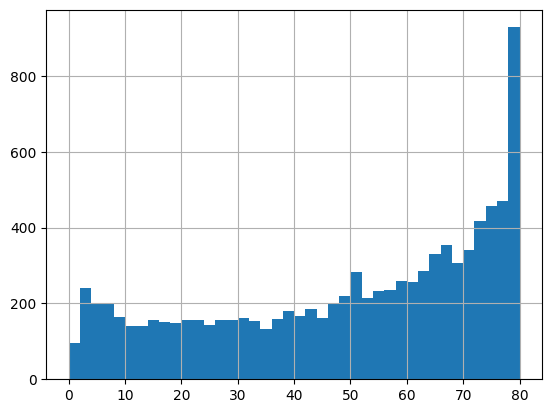

In [15]:
df_cleaned['gp'].hist(bins = bin_values)

In [16]:
# Starts to drop till 10, 10 can be the minimum number of games played

In [17]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp']>min_gp]

In [18]:
# To see how many players dropped
print(df_cleaned['player_id'].count() - df_filter['player_id'].count())

971


In [19]:
df_filter['gp'].describe()

count    9662.000000
mean       57.406541
std        21.069625
min        11.000000
25%        42.000000
50%        63.000000
75%        76.000000
max        85.000000
Name: gp, dtype: float64

# Normalized Data Across Seasons

In [20]:
# Someone who scored 22 points per game in the 1999 season may not be as
# impressive if they scored the same amount of points in the 2019 season
# Rules, play style and other factors have greatly changed 

In [21]:
# Normalize stats for each season
# Function that factors in the season max and min value and normalize that stat
# First try it with a single season before applying to all season stats

In [22]:
season = (df_filter['season_id'] == '2017-18')

In [23]:
df_2018 = df_filter[season]

In [24]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9761,2747,2017-18,80.0,32.0,28.1,3.0,7.4,0.403,1.8,4.8,...,0.5,0.7,0.696,0.4,2.6,1.8,1.0,0.9,0.1,8.3
9588,1628510,2017-18,15.0,25.0,13.9,1.7,4.9,0.342,1.2,3.3,...,0.1,0.3,0.250,0.3,2.0,0.4,0.5,0.2,0.1,4.6
9698,1627734,2017-18,74.0,22.0,24.5,4.6,8.9,0.514,0.2,0.5,...,2.3,3.0,0.750,2.2,5.5,2.0,1.9,0.5,0.4,11.6
9879,202713,2017-18,12.0,30.0,4.9,0.6,1.8,0.333,0.2,0.4,...,0.6,1.1,0.538,0.1,0.8,0.2,0.3,0.1,0.0,1.9
9789,1626185,2017-18,73.0,24.0,22.7,3.0,6.8,0.446,0.5,1.3,...,1.2,1.6,0.767,1.3,3.0,1.0,1.2,0.5,0.7,7.7
9857,1626162,2017-18,81.0,22.0,27.5,3.9,9.8,0.403,1.6,4.6,...,2.4,2.9,0.820,0.7,3.8,1.2,1.1,1.0,0.4,11.8
9679,1626153,2017-18,69.0,26.0,20.8,2.9,6.3,0.465,0.8,2.2,...,1.4,1.7,0.829,0.7,2.2,2.9,1.1,1.0,0.5,8.0
10054,203503,2017-18,75.0,26.0,27.4,2.5,5.7,0.435,1.4,3.6,...,0.5,0.6,0.792,0.1,1.8,1.3,0.5,0.6,0.4,6.9
9695,1628415,2017-18,82.0,22.0,28.7,4.1,9.4,0.440,1.1,3.2,...,1.5,2.0,0.747,0.6,2.5,1.6,1.5,0.9,0.2,11.0
9601,203463,2017-18,56.0,25.0,19.5,2.8,6.7,0.421,1.0,2.8,...,0.9,1.1,0.828,0.6,1.9,0.9,1.1,0.7,0.3,7.5


In [25]:
# To normalize take the points value substract the column minimum
# divided by the difference between max and min column value

In [26]:
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min())/(df_2018['pts'].max() - df_2018['pts'].min())

/var/folders/tq/_cbl6ng92jg5mjvmj4_4fy3w0000gn/T/ipykernel_4516/2835687542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min())/(df_2018['pts'].max() - df_2018['pts'].min())


In [27]:
df_2018.sort_values('pts_norm', ascending = False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [28]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [29]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [30]:
cols_to_norm = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [31]:
def replace(df):
    for cols in cols_to_norm:
        df['{}_norm'.format(cols)] = normalize(df[cols])
    return df

In [32]:
df_2018_norm = replace(df_2018)

/var/folders/tq/_cbl6ng92jg5mjvmj4_4fy3w0000gn/T/ipykernel_4516/3769116981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(cols)] = normalize(df[cols])
/var/folders/tq/_cbl6ng92jg5mjvmj4_4fy3w0000gn/T/ipykernel_4516/3769116981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(cols)] = normalize(df[cols])
/var/folders/tq/_cbl6ng92jg5mjvmj4_4fy3w0000gn/T/ipykernel_4516/3769116981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [33]:
df_2018_norm.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9846,1626147,2017-18,38.0,24.0,13.7,2.3,5.3,0.431,0.9,2.7,...,0.214286,0.27,0.080460,0.099010,0.137255,0.149533,0.067961,0.166667,0.08,0.076923
10024,1627746,2017-18,60.0,22.0,20.7,3.4,7.6,0.448,0.3,0.9,...,0.071429,0.09,0.183908,0.198020,0.313725,0.280374,0.116505,0.166667,0.24,0.307692
10020,1627885,2017-18,23.0,24.0,16.7,2.6,5.4,0.476,0.3,1.1,...,0.071429,0.11,0.137931,0.168317,0.078431,0.196262,0.233010,0.458333,0.20,0.115385
9964,1626181,2017-18,70.0,25.0,15.2,2.1,5.3,0.401,0.8,2.7,...,0.190476,0.27,0.057471,0.059406,0.039216,0.121495,0.126214,0.208333,0.18,0.076923
9606,1626246,2017-18,39.0,29.0,8.7,2.0,3.8,0.534,0.0,0.0,...,0.000000,0.00,0.229885,0.247525,0.235294,0.214953,0.058252,0.125000,0.18,0.115385
9630,202718,2017-18,36.0,29.0,19.2,3.0,6.5,0.462,1.4,3.4,...,0.333333,0.34,0.057471,0.079208,0.078431,0.177570,0.184466,0.208333,0.20,0.115385
10063,202684,2017-18,53.0,27.0,20.2,2.5,4.4,0.562,0.0,0.0,...,0.000000,0.00,0.091954,0.148515,0.470588,0.383178,0.058252,0.125000,0.14,0.115385
9771,1626143,2017-18,28.0,22.0,12.6,2.8,4.9,0.558,0.0,0.1,...,0.000000,0.01,0.091954,0.099010,0.156863,0.196262,0.038835,0.041667,0.16,0.230769
9670,1628432,2017-18,21.0,23.0,11.5,1.0,3.6,0.289,0.5,1.8,...,0.119048,0.18,0.045977,0.059406,0.019608,0.149533,0.058252,0.208333,0.10,0.038462
9709,202734,2017-18,82.0,29.0,31.5,5.2,10.1,0.508,1.6,3.7,...,0.380952,0.37,0.068966,0.079208,0.137255,0.186916,0.223301,0.416667,0.24,0.038462


In [34]:
# Used groupby method to apply this to each seasons
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [35]:
df_new = df_filter.groupby('season_id').apply(replace)
df_new.head(10)

player_id season_id    gp   age   min  fgm   fga  fg_pct  fg3m  \
season_id                                                                      
1996-97   0         471   1996-97  41.0   NaN  13.3  1.1   3.3   0.331   0.2   
          1         920   1996-97  83.0  33.0  30.8  2.8   5.8   0.483   0.0   
          2         243   1996-97  83.0  24.0  20.4  1.8   4.4   0.411   0.5   
          3        1425   1996-97  33.0  25.0  17.8  2.6   4.5   0.574   0.0   
          4         768   1996-97  47.0  27.0  11.1  1.4   3.8   0.374   0.0   
          5         228   1996-97  62.0  27.0  15.4  1.3   2.6   0.513   0.0   
          6         154   1996-97  45.0  30.0  13.1  0.9   2.0   0.435   0.0   
          7         673   1996-97  30.0  24.0  17.2  2.6   5.4   0.475   0.0   
          9         275   1996-97  81.0  26.0  34.3  5.4  12.7   0.423   1.8   
          10        947   1996-97  76.0  22.0  41.1  8.2  19.8   0.416   2.0   

              fg3a  ...  fg3m_norm  fg3a_norm  ftm_norm  fta_norm  oreb_norm  \
season_id           ...                                                        
1996-97   0    0.7  ...   0.071429   0.090909  0.156250  0.127660   0.118644   
          1    0.2  ...   0.000000   0.025974  0.234375  0.255319   0.457627   
          2    1.2  ...   0.178571   0.155844  0.171875  0.138298   0.084746   
          3    0.0  ...   0.000000   0.000000  0.156250  0.159574   0.322034   
          4    0.1  ...   0.000000   0.012987  0.171875  0.191489   0.118644   
          5    0.0  ...   0.000000   0.000000  0.171875  0.180851   0.203390   
          6    0.0  ...   0.000000   0.000000  0.078125  0.117021   0.220339   
          7    0.0  ...   0.000000   0.000000  0.234375  0.265957   0.271186   
          9    4.7  ...   0.642857   0.610390  0.343750  0.287234   0.084746   
          10   6.0  ...   0.714286   0.779221  0.781250  0.765957   0.254237   

              dreb_norm  ast_norm  stl_norm  tov_norm  blk_norm  
season_id                                                        
1996-97   0        0.16  0.122807  0.074074  0.181818  0.088235  
          1        0.50  0.070175  0.296296  0.204545  0.058824  
          2        0.20  0.166667  0.333333  0.250000  0.088235  
          3        0.23  0.043860  0.185185  0.227273  0.264706  
          4        0.11  0.035088  0.111111  0.159091  0.176471  
          5        0.21  0.043860  0.185185  0.159091  0.058824  
          6        0.22  0.026316  0.148148  0.136364  0.058824  
          7        0.21  0.070175  0.259259  0.227273  0.058824  
          9        0.22  0.192982  0.185185  0.477273  0.058824  
          10       0.24  0.657895  0.777778  1.000000  0.088235  

[10 rows x 35 columns]

# Distance Error between Players

In [36]:
def calc_distance(plyr1, plyr2):
    # Euclidean measurement between two player's stats
    # Measures the length of a segment connecting the two player's stats
    dist = np.sqrt(np.sum((plyr1-plyr2)**2))
    return dist

In [37]:
# Example Damian Lillard with Stephen Curry and Rudy Gobert
df1 = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [38]:
df2 = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', usecols = ['player_id', 'season_id', 'pts'])

In [39]:
# Run a left merge a.k.a a left outer join
# This will keep every row in the left data frame and try and match the 
# right data frame based on the 'on colum'
# If the right data frame doesn't have any of the values then non values will be added
df3 = pd.merge(df1,df2,on = 'player_id', how= 'left')

In [40]:
df3.sample(5)

,player_id,player_name,season_id,pts
947,2548,Dwyane Wade,2004-05,24.1
839,202682,Derrick Williams,2015-16,9.3
3435,2216,Zach Randolph,2007-08,17.6
994,202683,Enes Kanter,2012-13,7.2
2978,202714,Shelvin Mack,2014-15,5.4


In [41]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [42]:
df_2019.sample(5)

,player_id,player_name,season_id,pts
2434,1626149,Montrezl Harrell,2018-19,16.6
2009,202362,Lance Stephenson,2018-19,7.2
680,203967,Dario Saric,2018-19,10.6
1510,203924,Jerami Grant,2018-19,13.6
1764,1627823,Juan Hernangomez,2018-19,5.8


In [43]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
curry_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [44]:
# Use to list function so that pts can be accessed as a variable
dame_ppg = dame_df.pts.tolist()[0]
curry_ppg = curry_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [45]:
calc_distance(dame_ppg, curry_ppg)

1.5

In [46]:
calc_distance(dame_ppg, rudy_ppg)

9.9

In [47]:
# As a result Dame and Curry were closer than Dame and Ruby when 
# it came to points per game

# Find Player Func

In [49]:
dataframe = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [50]:
df_sample = dataframe.sample(10)

In [51]:
for row in df_sample.itertuples():
    print(row.season_id,row.player_id)

2005-06 2223
2016-17 1897
1999-00 431
2009-10 101204
2015-16 202702
2010-11 2072
1999-00 1023
2005-06 703
2006-07 2429
2018-19 1626179


In [52]:
def find_player(player_id, player_season):
    for row in df_sample.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [56]:
find_player(2072,'2010-11')

Pandas(Index=6541, player_id=2072, season_id='2010-11', gp=10.0, age=31.0, min=13.5, fgm=1.8, fga=4.5, fg_pct=0.4, fg3m=0.4, fg3a=1.7, fg3_pct=0.235, ftm=0.4, fta=0.4, ft_pct=1.0, oreb=0.0, dreb=0.8, ast=1.2, tov=0.4, stl=0.2, blk=0.1, pts=4.4)

In [55]:
df_sample

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
4360,2223,2005-06,66.0,26.0,26.7,3.0,5.6,0.531,0.0,0.0,...,1.4,2.0,0.705,2.4,5.8,0.4,1.6,0.5,2.4,7.3
9402,1897,2016-17,25.0,37.0,6.4,0.8,2.7,0.279,0.4,1.5,...,0.4,0.6,0.625,0.2,0.6,0.4,0.3,0.4,0.1,2.3
1698,431,1999-00,82.0,30.0,30.4,5.9,14.1,0.417,0.0,0.1,...,6.0,7.7,0.776,2.8,6.0,1.7,3.5,1.2,1.2,17.8
5915,101204,2009-10,2.0,27.0,3.5,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8862,202702,2015-16,67.0,26.0,25.3,5.2,9.3,0.558,0.0,0.0,...,2.0,3.3,0.613,3.5,5.2,1.2,1.4,0.5,0.9,12.5
6541,2072,2010-11,10.0,31.0,13.5,1.8,4.5,0.400,0.4,1.7,...,0.4,0.4,1.000,0.0,0.8,1.2,0.4,0.2,0.1,4.4
1473,1023,1999-00,54.0,31.0,13.0,1.5,4.1,0.364,0.6,1.9,...,0.5,0.7,0.684,0.3,1.6,1.3,0.8,0.7,0.1,4.0
4233,703,2005-06,53.0,33.0,26.6,3.6,7.4,0.486,0.0,0.0,...,1.4,1.7,0.815,1.9,5.9,1.1,1.1,0.4,1.0,8.6
4531,2429,2006-07,54.0,29.0,15.6,2.0,4.2,0.474,0.0,0.0,...,0.8,1.7,0.467,1.7,2.8,0.5,0.9,0.4,0.6,4.8
10570,1626179,2018-19,79.0,25.0,22.7,3.3,8.4,0.387,1.5,4.3,...,0.9,1.2,0.785,0.4,3.5,2.9,0.9,0.9,0.3,9.0


In [57]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [58]:
find_player(dataframe, 2544, '2012-13')

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

# Calculating Player Similarity

In [67]:
# Jrue Holiday
current_player_season = '2016-17'
current_player_id = 201950

##### Summarized everything above to keep things cleaned

In [68]:
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [69]:
df_cleaned = df.dropna(how='all')

In [70]:
min_gp = 10

In [71]:
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [72]:
cols_to_normalize = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [73]:
def replace(df):
    for cols in cols_to_normalize:
        df['{}_norm'.format(cols)] = normalize(df[cols])
    return df

In [74]:
df_norm = df_filter.groupby(['season_id']).apply(replace)

In [85]:
# In the normalized data frame, locate Jrue Holiday with player_id and season_id
# Only retrive the normalized pts indicated by 'pts_norm'
# If that is not included, entire row will be provided assuming .item() isn't included
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item()

In [86]:
jrue_pts_norm

0.474025974025974

In [ ]:
current_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item()
])

In [93]:
def player_vector(current_player_id, current_player_season):
    current_player_vector = np.array([
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[0])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[1])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[2])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[3])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[4])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[5])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[6])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[7])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[8])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[9])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[10])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[11])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[12])]).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), '{}_norm'.format(cols_to_normalize[13])]).item(),
        
    ])
    return current_player_vector
    

In [ ]:
def replace(df):
    for cols in cols_to_norm:
        df['{}_norm'.format(cols)] = normalize(df[cols])
    return df

In [103]:
current_player_vector = player_vector(current_player_id, current_player_season)
# Michael Kidd-Gilchrist
compared_player_vector = player_vector(203077, '2013-14')


In [104]:
# Transforms functions that are not numpy aware into a function that can
# return numpy arrays. Since the calc_distance function does not return
# a numpy array, np.vectorize can allows this which also can solve issues with float
vfunc = np.vectorize(calc_distance)

In [100]:
distance_vect = vfunc(current_player_vector, compared_player_vector)

In [101]:
distance_vect

array([0.25636036, 0.25468799, 0.32425743, 0.2887931 , 0.36585366,
       0.40734177, 0.01124438, 0.0736725 , 0.17054264, 0.04413314,
       0.57388229, 0.47      , 0.25675676, 0.05494505])

In [105]:
num = np.sum(np.abs(distance_vect)) / len(distance_vect)

In [106]:
num

0.25374793324911765

# Comparing Multiple Players

In [119]:
player_distance = []

In [120]:
df_sample = df_norm.sample(10)

In [121]:
for row in df_sample.itertuples():
    compared_player_vector = player_vector(row.player_id,row.season_id)
    vfunc = np.vectorize(calc_distance)
    distance_vect = vfunc(current_player_vector,compared_player_vector)
    num = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distance.append(num)
    player = row.player_id
    print('Done with ' + str(player) + '. Percent error was ' + str(num))

Done with 1629027. Percent error was 0.11881671364166028
Done with 722. Percent error was 0.19940509815072974
Done with 204028. Percent error was 0.3105061814508208
Done with 788. Percent error was 0.2169738481556749
Done with 1884. Percent error was 0.09982971053005883
Done with 101183. Percent error was 0.37802109583159177
Done with 998. Percent error was 0.4022682685879485
Done with 101150. Percent error was 0.18790378035064798
Done with 1627824. Percent error was 0.37136771705367283
Done with 1717. Percent error was 0.220885268932442


In [122]:
player_distance

[0.11881671364166028,
 0.19940509815072974,
 0.3105061814508208,
 0.2169738481556749,
 0.09982971053005883,
 0.37802109583159177,
 0.4022682685879485,
 0.18790378035064798,
 0.37136771705367283,
 0.220885268932442]

In [123]:
df_sample['distance'] = player_distance

In [124]:
ranked_df = df_sample.sort_values('distance')

In [125]:
ranked_df

player_id season_id    gp   age   min  fgm   fga  fg_pct  \
season_id                                                                   
2008-09   5380        1884   2008-09  65.0  30.0  34.6  5.5  14.8   0.370   
2018-19   10586    1629027   2018-19  81.0  20.0  30.9  6.5  15.5   0.418   
2007-08   5162      101150   2007-08  80.0  21.0  23.3  4.0   9.4   0.424   
1997-98   541          722   1997-98  79.0  24.0  35.6  7.1  14.4   0.495   
          698          788   1997-98  81.0  35.0  31.2  6.6  12.9   0.510   
2010-11   6356        1717   2010-11  73.0  33.0  34.3  8.4  16.2   0.517   
2016-17   9509      204028   2016-17  67.0  25.0  16.3  2.2   4.4   0.510   
2017-18   9743     1627824   2017-18  33.0  22.0   7.1  0.8   1.8   0.426   
2005-06   4376      101183   2005-06  57.0  22.0   8.5  0.8   1.7   0.454   
1997-98   730          998   1997-98  28.0  25.0   6.8  0.5   1.5   0.341   

                 fg3m  fg3a  ...  fg3a_norm  ftm_norm  fta_norm  oreb_norm  \
season_id                    ...                                             
2008-09   5380    1.5   5.0  ...   0.714286  0.266667  0.299065   0.162791   
2018-19   10586   1.9   6.0  ...   0.454545  0.432990  0.463636   0.148148   
2007-08   5162    0.7   1.9  ...   0.260274  0.341463  0.330275   0.121951   
1997-98   541     0.0   0.1  ...   0.016949  0.448718  0.491228   0.308824   
          698     0.0   0.1  ...   0.016949  0.384615  0.333333   0.426471   
2010-11   6356    0.9   2.3  ...   0.365079  0.710526  0.521368   0.155556   
2016-17   9509    0.0   0.0  ...   0.000000  0.130435  0.146789   0.488372   
2017-18   9743    0.4   1.1  ...   0.110000  0.057471  0.069307   0.098039   
2005-06   4376    0.0   0.0  ...   0.000000  0.085106  0.104348   0.270270   
1997-98   730     0.0   0.1  ...   0.016949  0.051282  0.052632   0.044118   

                 dreb_norm  ast_norm  stl_norm  tov_norm  blk_norm  distance  
season_id                                                                     
2008-09   5380    0.284211  0.700000  0.607143  0.763158  0.172414  0.099830  
2018-19   10586   0.254545  0.757009  0.409091  0.760000  0.074074  0.118817  
2007-08   5162    0.132075  0.275862  0.370370  0.363636  0.055556  0.187904  
1997-98   541     0.360825  0.276190  0.384615  0.685714  0.162162  0.199405  
          698     0.556701  0.095238  0.269231  0.571429  0.135135  0.216974  
2010-11   6356    0.576923  0.228070  0.208333  0.487179  0.230769  0.220885  
2016-17   9509    0.277228  0.045045  0.200000  0.142857  0.269231  0.310506  
2017-18   9743    0.084112  0.048544  0.041667  0.080000  0.076923  0.371368  
2005-06   4376    0.141414  0.028571  0.120000  0.108108  0.060606  0.378021  
1997-98   730     0.051546  0.028571  0.038462  0.085714  0.054054  0.402268  

[10 rows x 36 columns]

In [126]:
df1 = pd.read_csv('../nba-stats-csv/player_info.csv')

In [131]:
ranked_df.reset_index(drop = True, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [132]:
df_final = pd.merge(ranked_df, df1, on = ['player_id', 'season_id'],how = 'left').drop_duplicates()

In [133]:
df_final = df_final[['player_name','player_id', 'season_id', 'distance']]

In [134]:
df_final

,player_name,player_id,season_id,distance
0,Baron Davis,1884,2008-09,0.099830
3,NaN,1629027,2018-19,0.118817
4,Lou Williams,101150,2007-08,0.187904
7,Corliss Williamson,722,1997-98,0.199405
10,Kevin Willis,788,1997-98,0.216974
13,Dirk Nowitzki,1717,2010-11,0.220885
16,Tarik Black,204028,2016-17,0.310506
19,Guerschon Yabusele,1627824,2017-18,0.371368
20,Shavlik Randolph,101183,2005-06,0.378021
23,Mark Pope,998,1997-98,0.402268
